# Sales Price Study Notebook

Answer Business Requirement 1:
* The client is interested in discovering how the house attributes correlate with the sale price.
* Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.

## Inputs

* outputs/datasets/collection/HousePriceRecords.csv

## Outputs

* Generate code that answers Business Requirement 1.
* Generate code that can be used to build the Streamlit App.

## Additional Comments

* We want to do an Exploratory Data Analysis (EDA) to have a better understanding of the Dataset.

---

# Change working directory

We need to change the working directory from its current folder to its parent folder

* We access the current directory with os.getcwd()

In [8]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/hertiage-housing'

We want to make the parent of the current directory the new current directory

* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [9]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [14]:
current_dir = os.getcwd()
current_dir

'/workspace'

---

# Load House Sales Price Data

First we will load the data:

In [15]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/HousePriceRecords.csv")
print(df.shape)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/datasets/collection/HousePriceRecords.csv'

---

In [5]:

import pandas as pd
from ydata_profiling import ProfileReport
from ipywidgets import HTML, Button, widgets
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Findings:

Around 10% of the data is missing.

* There are 20 numeric values.
* There are 4 categorical/text values.

As there is only a small amount of data missing overall, for the purpose of the correlation and pps study, we will not be removing any data at this stage.

---

# Sales Correlation Study

We will use the spearman and pearson methods to assess correlation levels across the numeric valyes against SalePrice.

1. The spearman method is used to measure the monochronic relationships between features:
  * We will sort the values considering the absolute value, by setting key=abs.
  *  We use [1:] to exclude the series performing a correlation between SalePrice and SalePrice.
  * We want to see the top 10 correlations.

In [7]:
sales_corr_spearman = df.corr(method='spearman', numeric_only=True)['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
sales_corr_spearman

TypeError: corr() got an unexpected keyword argument 'numeric_only'

2. The pearson method is used to measure the linear relationships between features:

* We will use the same parameters as above.

In [ ]:
sales_corr_pearson = df.corr(method='pearson', numeric_only=True)['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
sales_corr_pearson

OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

## Findings:

Both methods have a moderate to strong and positive correlation between SalePrice and most variables.

* Next we will consider the top 5 levels of correlation between the two methods:

In [ ]:
top_corr = 5
set(sales_corr_pearson[:top_corr].index.to_list() + sales_corr_spearman[:top_corr].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

We will therefore study the following variables and investigate whether:

* Sold houses with a certain GarageArea (Garage area, measurement).
* Sold houses with a certain YearBuilt (Year house was built).
* Sold houses with a certain 1stFlrSF (1st Floor square feet, measurement).
* Sold houses with a TotalBsmtSF (Total Basement square feet, measurement).
* Sold houses with a certain OverallQual (Overall Finish & Material).
* Sold houses with a certain GrLivArea (Above Ground area, measurement).

**Note that there were 6 top variables found when searching for 5, this could be because there were variables with the same correlation levels, we will therefore use all 6**

In [ ]:
vars_to_study = list(set(sales_corr_pearson[:top_corr].index.to_list() + sales_corr_spearman[:top_corr].index.to_list()))
vars_to_study

['OverallQual',
 'YearBuilt',
 'TotalBsmtSF',
 '1stFlrSF',
 'GarageArea',
 'GrLivArea']

---

# EDA on Selected Variables

Next we will display the selected variables from the correlation study with SalePrice:

In [ ]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head()

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GarageArea,GrLivArea,SalePrice
0,7,2003,856,856,548,1710,208500
1,6,1976,1262,1262,460,1262,181500
2,7,2001,920,920,608,1786,223500
3,7,1915,756,961,642,1717,140000
4,8,2000,1145,1145,836,2198,250000


Next we will distribute it by SalesPrice

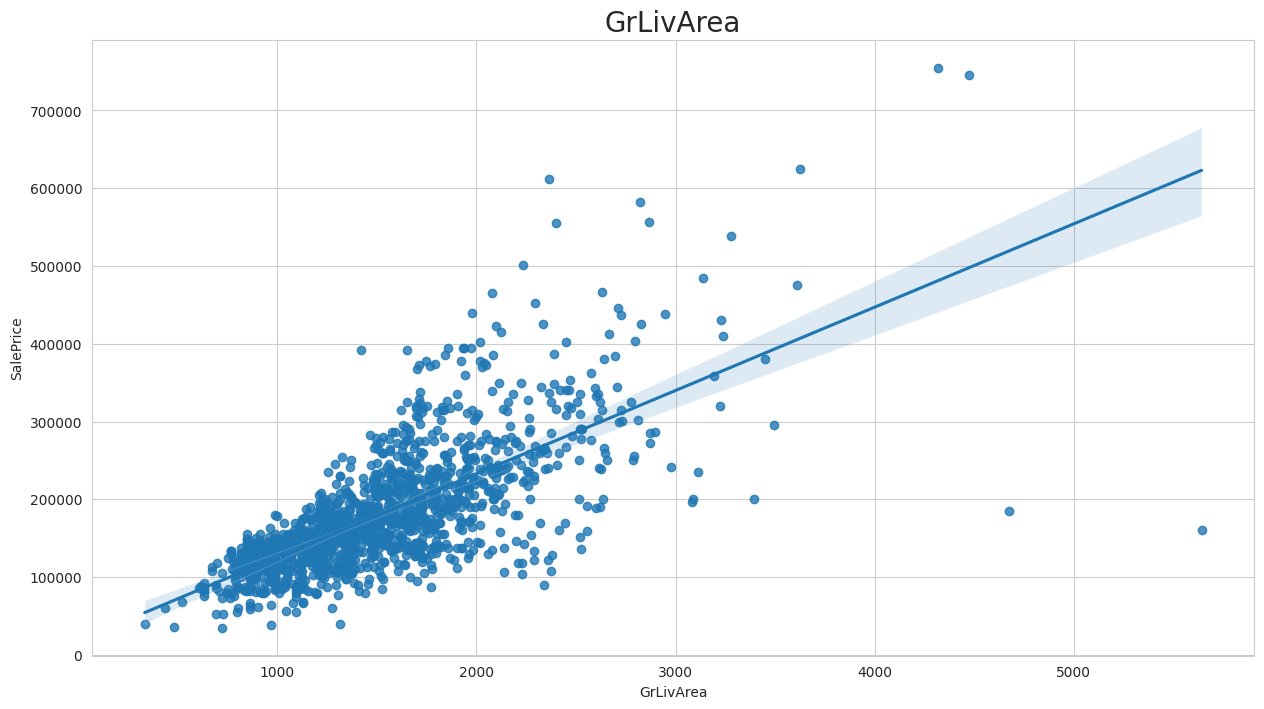

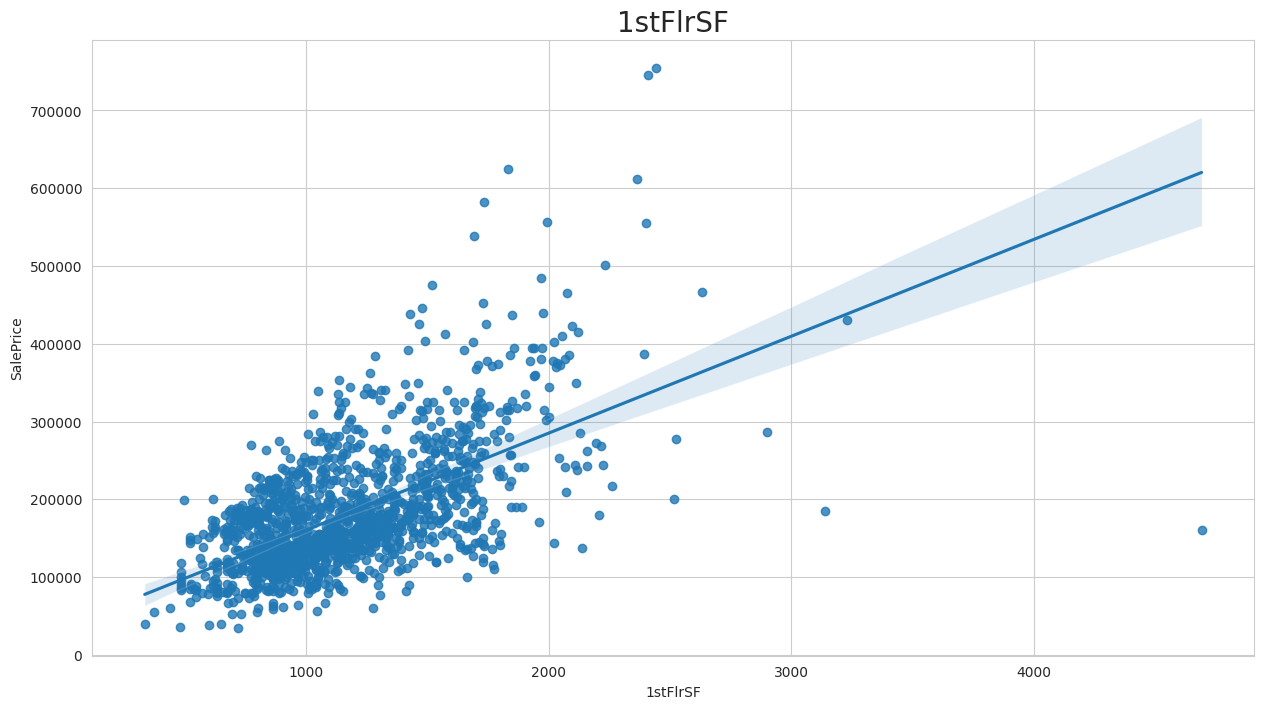

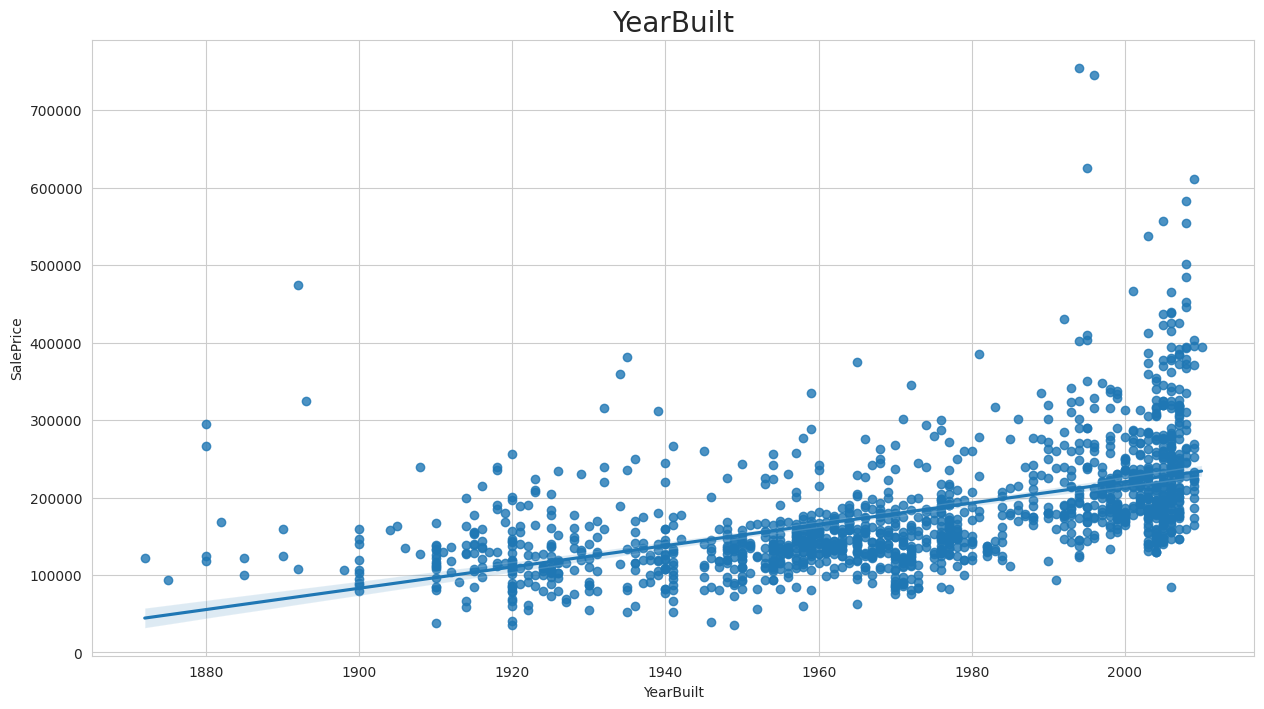

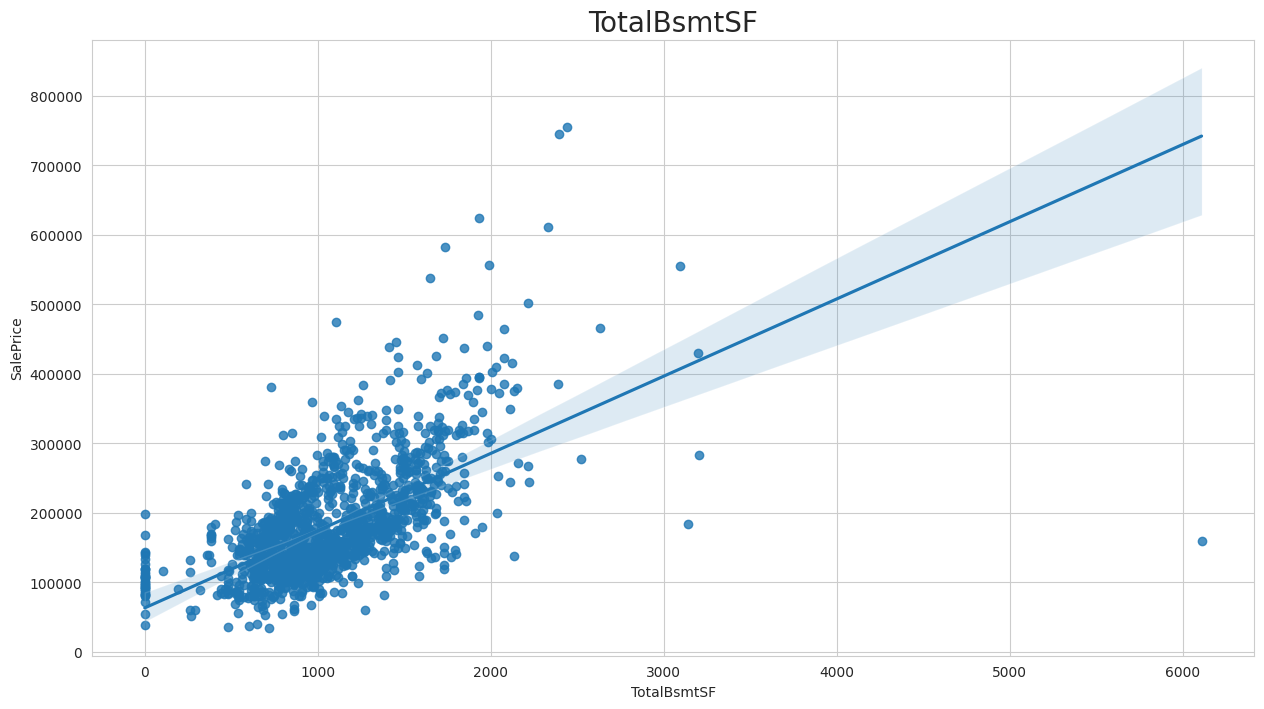

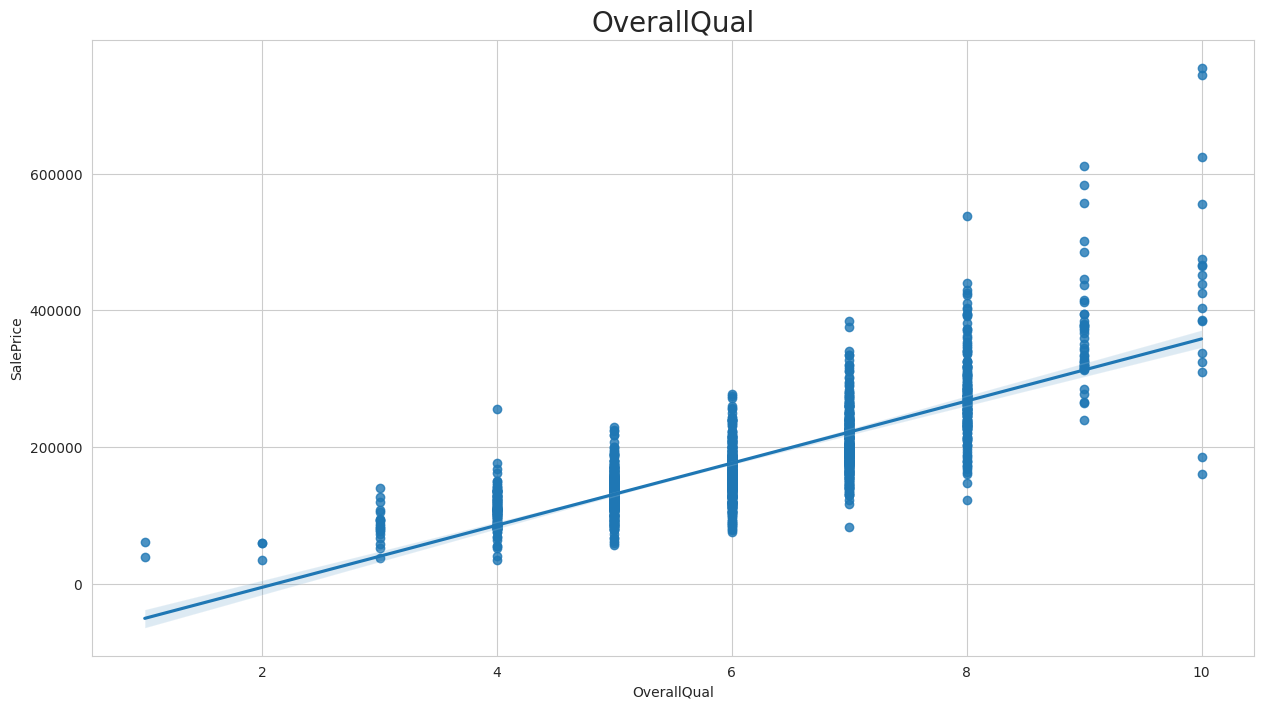

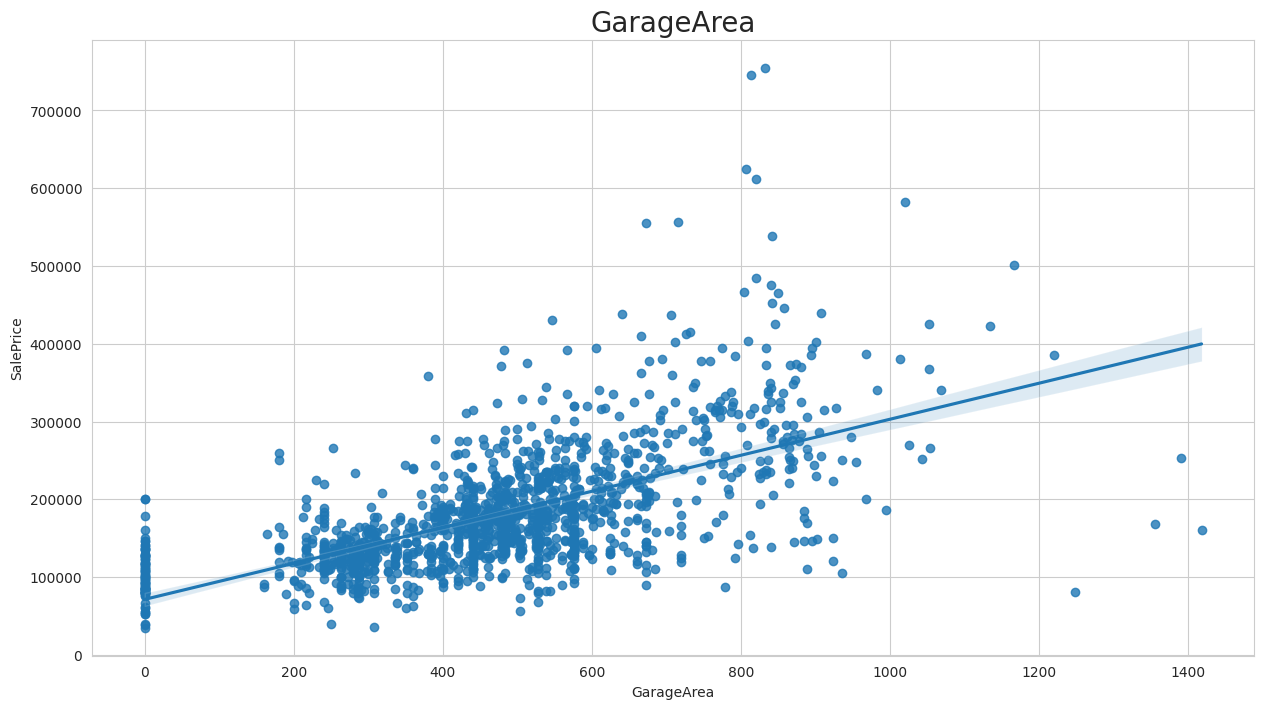

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline


def plot_numerical(df, col, target_var):
  plt.figure(figsize=(15, 8))
  sns.regplot(data=df, x=col, y=target_var)  
  plt.title(f"{col}", fontsize=20)
  plt.show()


target_var = 'SalePrice'
for col in vars_to_study:
  plot_numerical(df_eda, col, target_var)
  print("\n\n")

## Findings:

* The correlation analysis suggests that the the ground floor living area (GrLivArea), first floor area (1stFlrSF), basement (TotalBsmtSF), and garage area (GarageArea) strongly influence the SalePrice of a house.

* The analysis also suggets that the year of the house (YearBuilt), and quality of materials used/finishes (OverallQual) have a moderate influence on the (SalePrice) of a house.

---

# Conclusions

We will therefore study the following variables and investigate whether:

* Sold houses with a certain GarageArea (Garage area, measurement).
* Sold houses with a certain YearBuilt (Year house was built).
* Sold houses with a certain 1stFlrSF (1st Floor square feet, measurement).
* Sold houses with a TotalBsmtSF (Total Basement square feet, measurement).
* Sold houses with a certain OverallQual (Overall Finish & Material).
* Sold houses with a certain GrLivArea (Above Ground area, measurement).

## Findings from EDA:

* The correlation analysis suggests that the the ground floor living area (GrLivArea), first floor area (1stFlrSF), basement (TotalBsmtSF), and garage area (GarageArea) strongly influence the SalePrice of a house.

* The analysis also suggets that the year of the house (YearBuilt), and quality of materials used/finishes (OverallQual) have a moderate influence on the (SalePrice) of a house.

* The next steps is to complete Data Cleaning and perform a PPS Study.

---